## Лабораторная работа №1
Возьмем датасет численности постоянного населения РФ за 2014 год https://rosstat.gov.ru/opendata/7708234640-population

Задание:
Часть 1
1.	Найти на сайте РосСтат https://rosstat.gov.ru/free_doc/new_site/zdor22/PublishSite_2022/index.html данные, распределение которых было бы близко к
a) нормальному (визуально выглядит как кривая Гаусса - «колокол»),
 б) равномерному.
2.	 Найти распределение со смещенной медианой относительно среднего (~15% размаха) и несмещенной.
3.	Посчитать описательные характеристики распределения выбранных данных (среднее, мода, медиана),  дать визуальное представление данных (условное форматирование Excel, построить график рассеивания/гистограмму/круговую диаграмму).
Часть 2
4.	Найти датасет с аномальными значениями, которые можно выявить, построив диаграмму размаха «ящик с усами». Попробовать выдвинуть гипотезу о причинах аномальности, которую можно подтвердить дальнейшими исследованиями, используя синтетические признаки (или  корреляционный анализ и т.п.).


In [2]:
# импорт библиотек

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv(r'df_lab_1.csv', encoding='cp1251')

In [4]:
df

,number,year,kode,region,municipalities,total,urban,rural,Unnamed: 8,Unnamed: 9,Unnamed: 10
0,1,2014,7.900000e+09,Республика Адыгея,Муниципальные образования Республики Адыгеи,446406.0,209929.0,236477.0,NaN,NaN,NaN
1,2,2014,7.970100e+09,Республика Адыгея,Городской округ 'Город Майкоп',167620.0,144544.0,23076.0,NaN,NaN,NaN
2,3,2014,7.970100e+14,Республика Адыгея,г. Майкоп,144544.0,144544.0,0.0,NaN,NaN,NaN
3,4,2014,7.970300e+09,Республика Адыгея,Городской округ 'Город Адыгейск',14935.0,12481.0,2454.0,NaN,NaN,NaN
4,5,2014,7.970300e+14,Республика Адыгея,г. Адыгейск,12481.0,12481.0,0.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
25584,25585,2014,7.763342e+09,Чукотский автономный округ,Сельское поселение Лаврентия,1388.0,0.0,1388.0,NaN,NaN,NaN
25585,25586,2014,7.763342e+09,Чукотский автономный округ,Сельское поселение Лорино,1160.0,0.0,1160.0,NaN,NaN,NaN
25586,25587,2014,7.763343e+09,Чукотский автономный округ,Сельское поселение Нешкан,675.0,0.0,675.0,NaN,NaN,NaN
25587,25588,2014,7.763344e+09,Чукотский автономный округ,Сельское поселение Уэлен,697.0,0.0,697.0,NaN,NaN,NaN


Будем работать со столбцом total

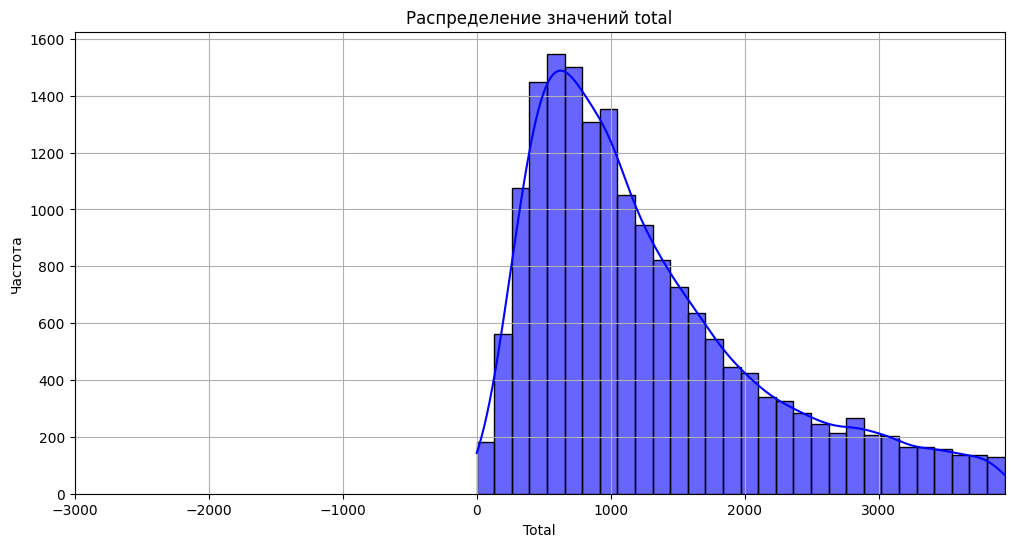

In [7]:
total_data = df['total'].dropna()

top_5_values = total_data.value_counts().nlargest(5).index

margin = 3000 
min_value = min(top_5_values) - margin
max_value = max(top_5_values) + margin

# Фильтруем данные для построения графика
filtered_data = total_data[(total_data >= min_value) & (total_data <= max_value)]

# Построение графика
plt.figure(figsize=(12, 6))
sns.histplot(filtered_data, bins=30, kde=True, color='blue', alpha=0.6)
plt.title('Распределение значений total')
plt.xlabel('Total')
plt.ylabel('Частота')
plt.xlim(min_value, max_value)  # Ограничиваем ось X
plt.grid()
plt.show()


Для графика используем окрестность 5ти самых больших значений, тк график имеет очень "длинный" хвост

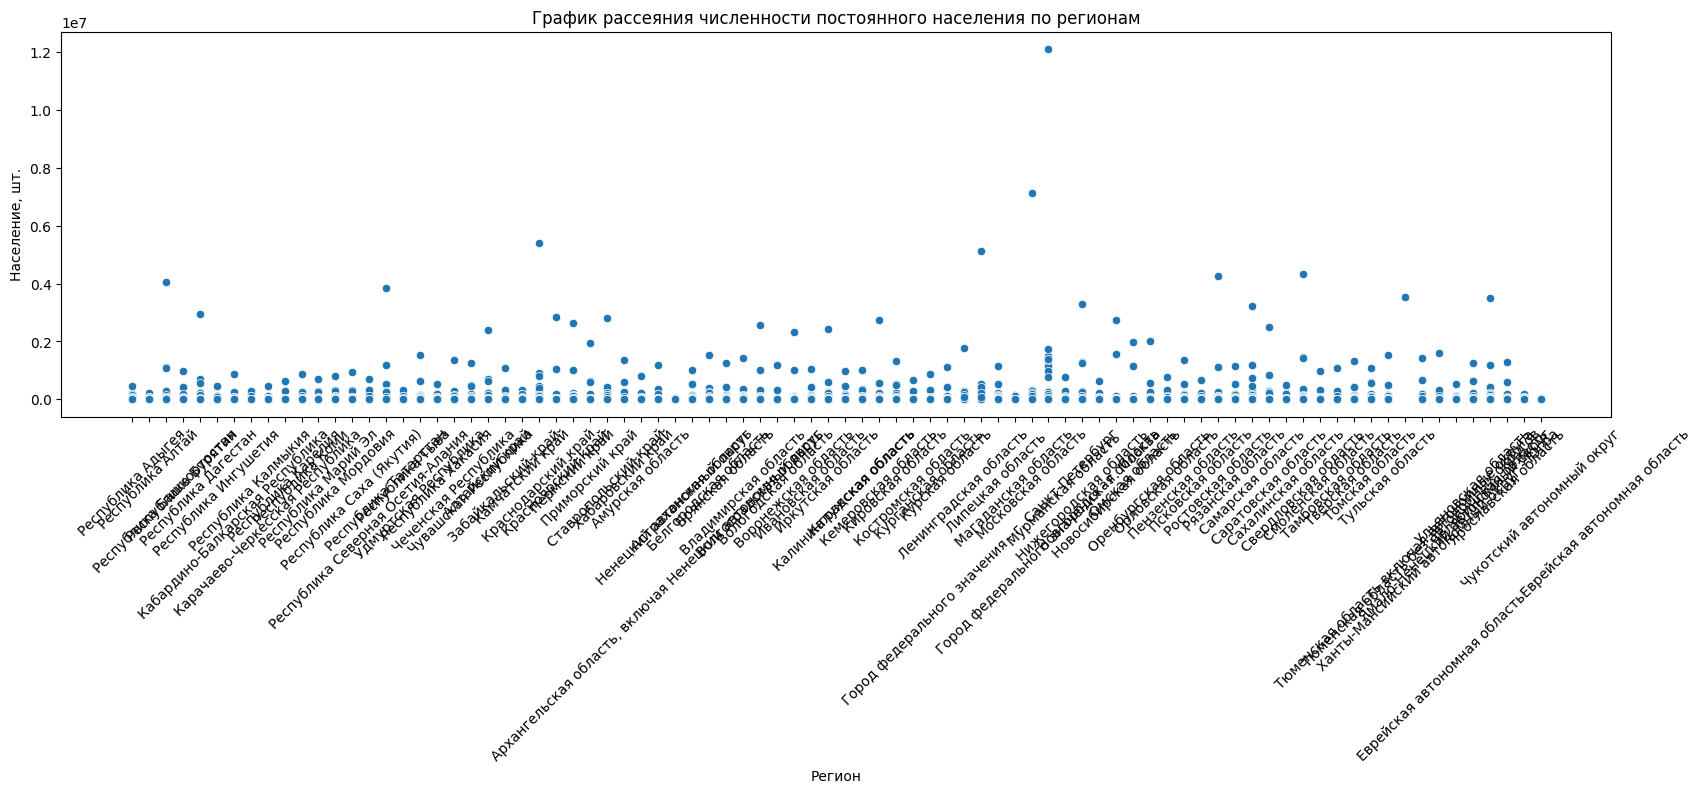

In [66]:
# Визуализация графика рассеяния
plt.figure(figsize=(20, 5))
sns.scatterplot(x='region', y='total', data=df)
plt.title('График рассеяния численности постоянного населения по регионам')
plt.xlabel('Регион')
plt.ylabel('Население, шт.')
plt.xticks(rotation=45)
plt.show()

In [63]:
print('Мода: ', df['total'].mode()[0])
print('Среднее значение: ',df['total'].mean())
print('Медиана: ',df['total'].median())

Мода:  937.0
Среднее значение:  19091.409976098115
Медиана:  1624.0


Видим какую большую разницу показывают основные описательные статистики

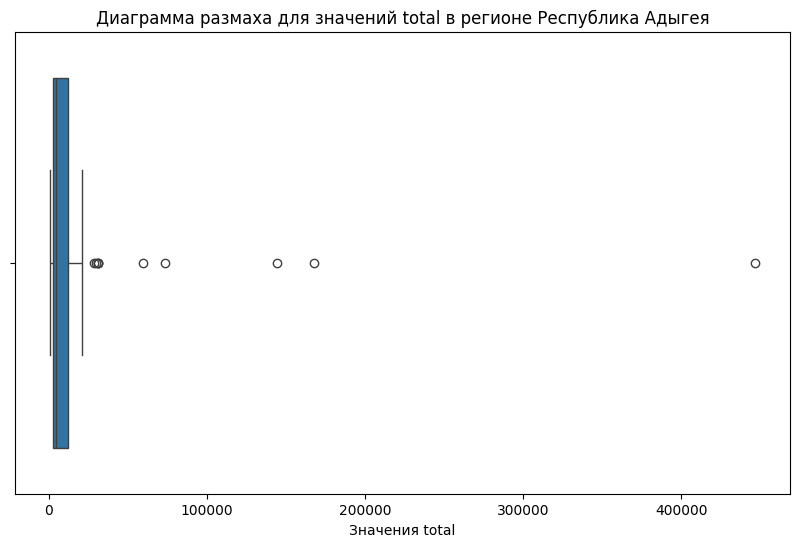

Аномальные значения (выбросы):
               region                               municipalities     total
0   Республика Адыгея  Муниципальные образования Республики Адыгеи  446406.0
1   Республика Адыгея               Городской округ 'Город Майкоп'  167620.0
2   Республика Адыгея                                    г. Майкоп  144544.0
5   Республика Адыгея               Гиагинский муниципальный район   31213.0
11  Республика Адыгея            Кошехабльский муниципальный район   30180.0
21  Республика Адыгея        Красногвардейский муниципальный район   31157.0
29  Республика Адыгея               Майкопский муниципальный район   59640.0
40  Республика Адыгея           Тахтамукайский муниципальный район   73765.0
43  Республика Адыгея         Городское поселение пгт. Яблоновский   31069.0
44  Республика Адыгея                             пгт. Яблоновский   28873.0


In [75]:
region_name = 'Республика Адыгея'  # Укажите нужный регион
filtered_data = df[df['region'] == region_name]

plt.figure(figsize=(10, 6))
sns.boxplot(x=filtered_data['total'])
plt.title(f'Диаграмма размаха для значений total в регионе {region_name}')
plt.xlabel('Значения total')
plt.show()

Q1 = filtered_data['total'].quantile(0.25)
Q3 = filtered_data['total'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = filtered_data[(filtered_data['total'] < lower_bound) | (filtered_data['total'] > upper_bound)]
print("Аномальные значения (выбросы):")
print(outliers[['region', 'municipalities', 'total']])

### Аномальные значения в распределении численности постоянного населения могут быть объяснены следующими факторами:
1. Разные уровни жизни: В некоторых регионах, особенно в крупных городах, может быть больше людей, работающих на более высокооплачиваемых работах. Это может привести к тому, что численность населения в этих местах будет значительно выше, чем в других регионах.
2. Разные способы подсчета: В разных регионах могут использоваться разные методы для подсчета населения. Например, в одном регионе могут учитывать временных работников или людей, которые приезжают на работу, а в другом — только постоянных жителей. Это может привести к разным числам.
2. Специфика экономики: В некоторых регионах могут быть специфические отрасли, такие как добыча полезных ископаемых или тяжелая промышленность, которые требуют много работников. Это может привести к тому, что численность населения в этих местах будет выше, чем в других регионах, где таких отраслей нет.